In [35]:
import numpy
import pandas as pa
import numpy as np
import matplotlib.pyplot as plt

arbres = pa.read_csv("./p2-arbres-fr.csv", sep=";")
# print(arbres)
arbres.head()

,id,type_emplacement,domanialite,arrondissement,complement_addresse,numero,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
0,99874,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,19,Marronnier,Aesculus,hippocastanum,NaN,20,5,NaN,0.0,48.857620,2.320962
1,99875,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,20,If,Taxus,baccata,NaN,65,8,A,NaN,48.857656,2.321031
2,99876,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,21,If,Taxus,baccata,NaN,90,10,A,NaN,48.857705,2.321061
3,99877,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,22,Erable,Acer,negundo,NaN,60,8,A,NaN,48.857722,2.321006
4,99878,Arbre,Jardin,PARIS 17E ARRDT,NaN,NaN,PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING,000G0037,Arbre à miel,Tetradium,daniellii,NaN,38,0,NaN,NaN,48.890435,2.315289


In [36]:
arbres.libelle_francais.head(20).unique()

array(['Marronnier', 'If', 'Erable', 'Arbre à miel', 'Platane', 'Sophora',
       'Prunus n. sp.', 'Hêtre', 'Micocoulier', 'Tilleul', 'Chêne',
       'Savonnier', 'Copalme'], dtype=object)

In [37]:
from collections import Counter

labels_unique=arbres.libelle_francais.unique()
labels=arbres.libelle_francais
somme_genre = arbres.libelle_francais.value_counts()
somme_genre_norm = arbres.libelle_francais.value_counts(normalize=True)
distribution = dict()
total = somme_genre.sum()
frequences_list = []
values_list =[]
names_list = []
for key, value in somme_genre.items():
  frequence = value/total
  distribution[f"{key}"] = [value, frequence]
distribution

for key, value in somme_genre.items():
   frequences_list.append(value/total)
   values_list.append(value)
   names_list.append(key)
frequences_list
values_list
names_list
somme_genre.describe()
#test = somme_genre.where)(somme_genre.values < 3500).dropna()
#test
# total

count      192.000000
mean      1034.583333
std       4193.509926
min          1.000000
25%          5.000000
50%         47.000000
75%        390.500000
max      42508.000000
Name: libelle_francais, dtype: float64

In [38]:
np_distr = np.array([[key,value] for (key,value) in somme_genre.iteritems()])
np_distr[:5]

array([['Platane', '42508'],
       ['Marronnier', '25207'],
       ['Tilleul', '21305'],
       ['Erable', '18389'],
       ['Sophora', '11797']], dtype='<U32')

In [39]:
np_frequences = np.array([frequences_list])
np_values = np.array([values_list])
np_names = np.array([names_list])
np_dtr_f_str = np.concatenate((np_distr,np_frequences.T),axis=1)
np_dtr_f_str[:5]

array([['Platane', '42508', '0.21399516713652839'],
       ['Marronnier', '25207', '0.1268979057591623'],
       ['Tilleul', '21305', '0.10725432944019331'],
       ['Erable', '18389', '0.09257450664518728'],
       ['Sophora', '11797', '0.05938884414015304']], dtype='<U32')

In [40]:
var = np_frequences.dtype
seuil_mini = 3500
np_val_f = np.concatenate((np_values,np_frequences),axis=0)
np.where(np_val_f>10000)
np_val_f.dtype
np_val_f.shape
np_distribution = np.array([distribution])
test3 = somme_genre[:(len(somme_genre)-10)]
#test3mask[[occurence.where(somme_genre.values < seuil_mini)]] = False
#result = occurence[test3mask,...]

test1 = somme_genre.where(somme_genre.values < seuil_mini).sum()

In [41]:
test2 = somme_genre.head(10)
test3
autres_sommes = somme_genre.tail(len(somme_genre)-10).sum()


In [42]:
test4 = ['autres',10]

In [43]:
test2.loc['autres']=test1
#test3 = pa.DataFrame('libelle_francais':test2[0], 'somme':test2[1], frequence = np_frequences)

np_frequences = np.array([frequences_list])
np_values = np.array([values_list])
np_names = np.array([names_list])
type(np_frequences)
np_frequences
np_values
# print(np_names[0])
test5 = pa.DataFrame({'libelle_francais':np_names[0], 'somme_genre':np_values[0], 'frequence':np_frequences[0]})
type(test5)
test6 = pa.DataFrame({'somme_genre':somme_genre[:], 'frequence':np_frequences[0]})
len(test6)
type(test6)
type(somme_genre)
somme_genre
test6

,somme_genre,frequence
Platane,42508,0.213995
Marronnier,25207,0.126898
Tilleul,21305,0.107254
Erable,18389,0.092575
Sophora,11797,0.059389
...,...,...
Cordyline,1,0.000005
Camphrier,1,0.000005
Jujubier,1,0.000005
Maackie,1,0.000005


In [44]:
somme_genre_df = pa.DataFrame({'somme_genre':somme_genre, 'frequence':np_frequences[0]})
autres = somme_genre_df.where(somme_genre_df.values < 3500).dropna()
valeur = somme_genre_df[:10].keys
seuil_mini = 3500
occur_sum = somme_genre_df.tail(len(somme_genre_df)-10).sum()
occur_head = somme_genre_df.head(10)
occur_head.loc['autres'] = occur_sum
occur_head.sort_values('somme_genre')

A:\ProgramData\Anaconda3\envs\OCR_projet2\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


,somme_genre,frequence
Cerisier à fleurs,3767.0,0.018964
Chêne,3866.0,0.019462
Micocoulier,4201.0,0.021149
Pin,4844.0,0.024386
Frêne,5171.0,0.026032
Sophora,11797.0,0.059389
Erable,18389.0,0.092575
Tilleul,21305.0,0.107254
Marronnier,25207.0,0.126898
Platane,42508.0,0.213995


<AxesSubplot:ylabel='somme_genre'>

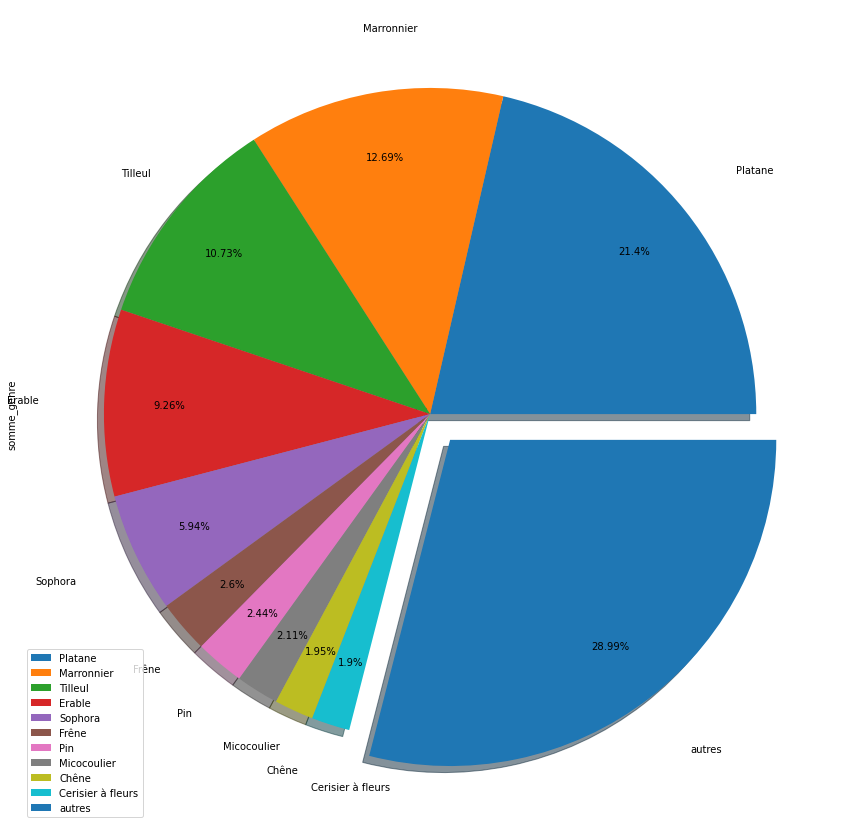

In [45]:
occur_head.plot.pie(
    y='somme_genre',
    figsize =(15,15),
    subplots=False,
    explode = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.1],
    autopct = lambda x: str(round(x, 2)) + '%',
    center = (1,0),
    labeldistance = 1.2,
    pctdistance = 0.8,
    shadow = True)


a utulise pour la futur representation hauteur localisation densite sur le territoire


<AxesSubplot:>

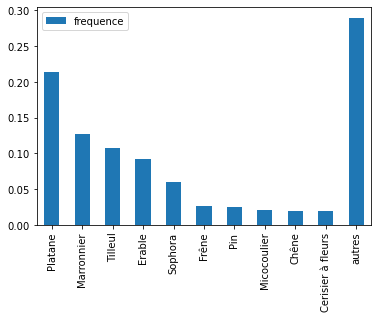

In [46]:
occur_head.plot.bar(y='frequence')

<AxesSubplot:ylabel='Frequency'>

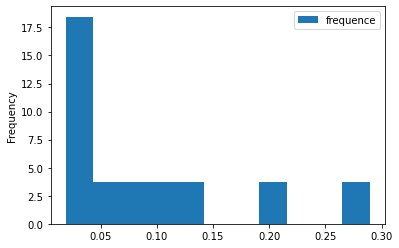

In [47]:
occur_head.plot.hist(y='frequence',density=True, bins=11)

<AxesSubplot:ylabel='Frequency'>

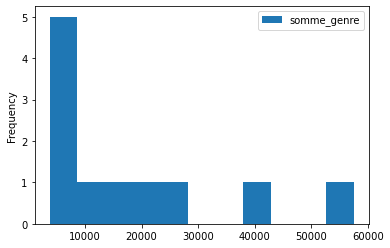

In [48]:
occur_head.plot.hist(y='somme_genre',bins=11)

In [49]:
arbres.describe()

,id,numero,circonference_cm,hauteur_m,remarquable,geo_point_2d_a,geo_point_2d_b
count,2.001370e+05,0.0,200137.000000,200137.000000,137039.000000,200137.000000,200137.000000
mean,3.872027e+05,NaN,83.380479,13.110509,0.001343,48.854491,2.348208
std,5.456032e+05,NaN,673.190213,1971.217387,0.036618,0.030234,0.051220
min,9.987400e+04,NaN,0.000000,0.000000,0.000000,48.742290,2.210241
25%,1.559270e+05,NaN,30.000000,5.000000,0.000000,48.835021,2.307530
50%,2.210780e+05,NaN,70.000000,8.000000,0.000000,48.854162,2.351095
75%,2.741020e+05,NaN,115.000000,12.000000,0.000000,48.876447,2.386838
max,2.024745e+06,NaN,250255.000000,881818.000000,1.000000,48.911485,2.469759


In [50]:
arbres.head()

,id,type_emplacement,domanialite,arrondissement,complement_addresse,numero,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
0,99874,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,19,Marronnier,Aesculus,hippocastanum,NaN,20,5,NaN,0.0,48.857620,2.320962
1,99875,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,20,If,Taxus,baccata,NaN,65,8,A,NaN,48.857656,2.321031
2,99876,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,21,If,Taxus,baccata,NaN,90,10,A,NaN,48.857705,2.321061
3,99877,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,22,Erable,Acer,negundo,NaN,60,8,A,NaN,48.857722,2.321006
4,99878,Arbre,Jardin,PARIS 17E ARRDT,NaN,NaN,PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING,000G0037,Arbre à miel,Tetradium,daniellii,NaN,38,0,NaN,NaN,48.890435,2.315289


In [51]:
hauteurs = arbres["hauteur_m"]
hauteurs_clean = hauteurs.where((0 < hauteurs) & (hauteurs <= 45))
hauteurs_count = hauteurs_clean.value_counts()
hauteurs_count

10.0    28632
5.0     26345
15.0    17228
8.0     13628
12.0    11019
6.0     10543
20.0     7494
7.0      6791
4.0      4816
9.0      4717
18.0     4101
14.0     3968
16.0     3348
13.0     3015
11.0     2989
3.0      2988
25.0     2089
17.0     1793
2.0      1441
22.0     1112
1.0       449
19.0      438
28.0      228
30.0      223
24.0      218
23.0      204
21.0      160
26.0      150
27.0      143
29.0       75
35.0       25
40.0       23
45.0       19
31.0       15
32.0       11
34.0        8
33.0        5
42.0        3
37.0        2
38.0        1
43.0        1
Name: hauteur_m, dtype: int64

In [52]:
modalites = hauteurs_count.index
tab = pa.DataFrame(modalites, columns=["hauteur_m"])
tab

,hauteur_m
0,10.0
1,5.0
2,15.0
3,8.0
4,12.0
5,6.0
6,20.0
7,7.0
8,4.0
9,9.0


In [53]:
tab["n"] = hauteurs_count.values
tab

,hauteur_m,n
0,10.0,28632
1,5.0,26345
2,15.0,17228
3,8.0,13628
4,12.0,11019
5,6.0,10543
6,20.0,7494
7,7.0,6791
8,4.0,4816
9,9.0,4717


In [54]:
tab["f"] = tab["n"] / len(hauteurs_clean)
tab

,hauteur_m,n,f
0,10.0,28632,0.143062
1,5.0,26345,0.131635
2,15.0,17228,0.086081
3,8.0,13628,0.068093
4,12.0,11019,0.055057
5,6.0,10543,0.052679
6,20.0,7494,0.037444
7,7.0,6791,0.033932
8,4.0,4816,0.024064
9,9.0,4717,0.023569


In [55]:
tab = tab.sort_values("hauteur_m")
tab["F"] = tab["f"].cumsum()
tab

,hauteur_m,n,f,F
20,1.0,449,0.002243,0.002243
18,2.0,1441,0.007200,0.009444
15,3.0,2988,0.014930,0.024373
8,4.0,4816,0.024064,0.048437
1,5.0,26345,0.131635,0.180072
5,6.0,10543,0.052679,0.232751
7,7.0,6791,0.033932,0.266682
3,8.0,13628,0.068093,0.334776
9,9.0,4717,0.023569,0.358345
0,10.0,28632,0.143062,0.501407


In [56]:
tab.describe()

,hauteur_m,n,f,F
count,41.000000,41.000000,41.000000,41.000000
mean,21.341463,3913.609756,0.019555,0.618599
std,12.537164,6765.683162,0.033805,0.265571
min,1.000000,1.000000,0.000005,0.002243
25%,11.000000,25.000000,0.000125,0.516341
50%,21.000000,449.000000,0.002243,0.778981
75%,31.000000,4101.000000,0.020491,0.801251
max,45.000000,28632.000000,0.143062,0.801741


<AxesSubplot:>

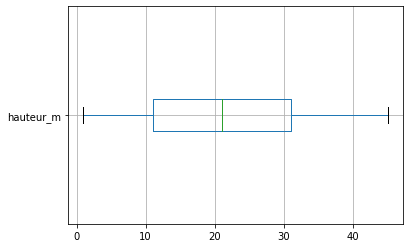

In [57]:
tab.boxplot('hauteur_m', vert=False)

--------------------
Marronnier
moy:
 10.702185900741858
med:
 10.0
mod:
 0    10
dtype: int64
var:
 192.89139165934108
e-t:
 13.888534539660442
skw:
 58.62780331954008
kur:
 4493.0611689559255


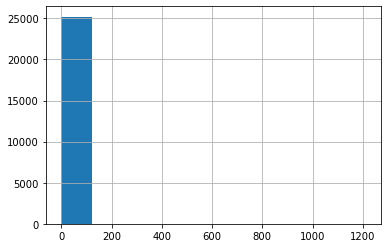

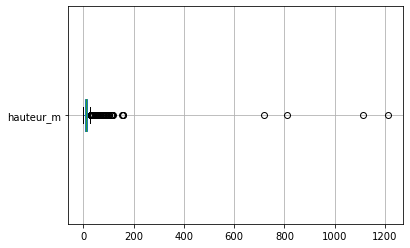

--------------------
If
moy:
 4.97092731829574
med:
 5.0
mod:
 0    0
dtype: int64
var:
 23.870833977173515
e-t:
 4.885778748282971
skw:
 4.309359248734915
kur:
 67.79151416905908


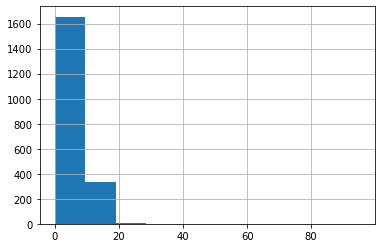

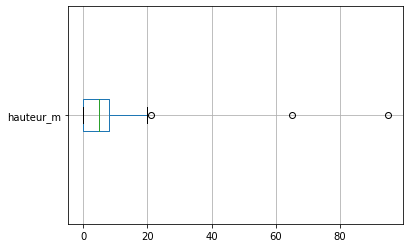

--------------------
Erable
moy:
 7.046168905323835
med:
 6.0
mod:
 0    0
dtype: int64
var:
 101.25639254985606
e-t:
 10.062623542091599
skw:
 40.81893358738783
kur:
 2921.862344865435


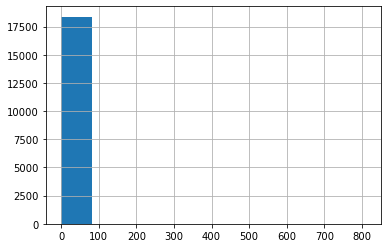

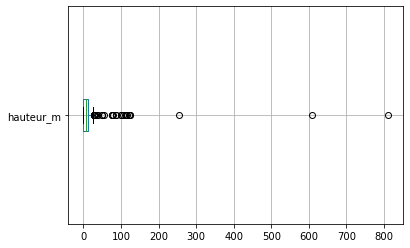

--------------------
Arbre à miel
moy:
 3.0
med:
 0.0
mod:
 0    0
dtype: int64
var:
 15.132075471698114
e-t:
 3.889996847260691
skw:
 1.358066945802995
kur:
 1.56055374253233


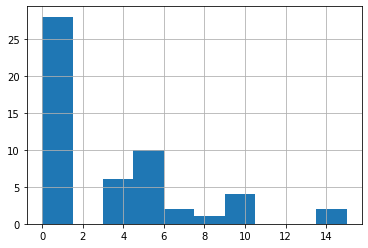

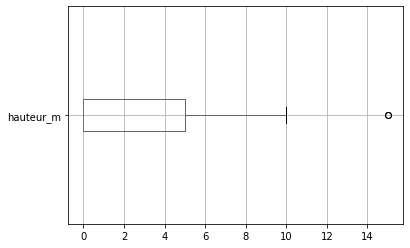

--------------------
Platane
moy:
 12.516937988143408
med:
 12.0
mod:
 0    15
dtype: int64
var:
 511.62761843993036
e-t:
 22.619186953556273
skw:
 73.28516323959387
kur:
 6598.136855936795


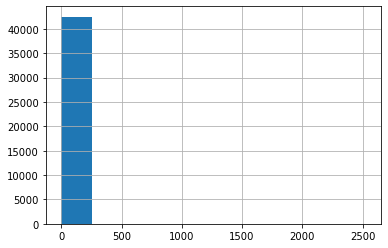

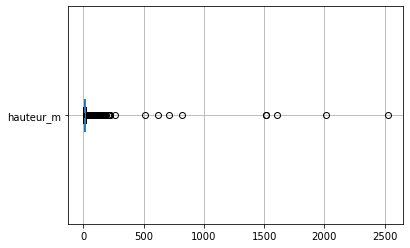

--------------------
Sophora
moy:
 9.49292192930406
med:
 10.0
mod:
 0    10
dtype: int64
var:
 2437.0532049658605
e-t:
 49.366519068756105
skw:
 97.40965963865477
kur:
 10038.358489688084


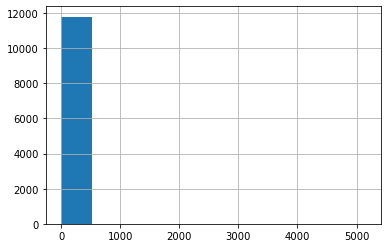

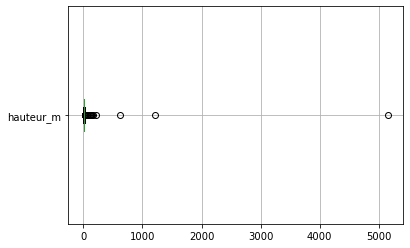

In [58]:
for name in arbres['libelle_francais'].head(10).unique():
    subset = arbres[arbres.libelle_francais == name]
    print("-"*20)
    print(name)
    # print(subset.describe())
    print("moy:\n",subset['hauteur_m'].mean())
    print("med:\n",subset['hauteur_m'].median())
    print("mod:\n",subset['hauteur_m'].mode())
    print("var:\n",subset['hauteur_m'].var(ddof=0))
    print("e-t:\n",subset['hauteur_m'].std(ddof=0))
    print("skw:\n",subset['hauteur_m'].skew())
    print("kur:\n",subset['hauteur_m'].kurtosis())
    subset["hauteur_m"].hist()
    plt.show()
    subset.boxplot(column="hauteur_m", vert=False)
    plt.show()

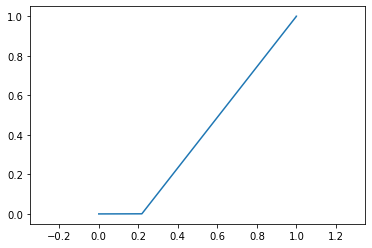

In [59]:
ht_moy = arbres.hauteur_m.mean()
type(arbres.hauteur_m)
hauteur_inf = arbres.where(arbres['hauteur_m']<ht_moy)

ht_inf = ~np.isnan(hauteur_inf.hauteur_m.values)

n = len(ht_inf)
n
lorenz = np.cumsum(np.sort(ht_inf)) / ht_inf.sum()
np.mean(lorenz)
lorenz = np.append([0],lorenz)
plt.axes().axis('equal')
xaxis = np.linspace(0-1/n,1+1/n,n+1)
plt.plot(xaxis,lorenz,drawstyle='steps-post')
plt.show()

In [60]:
AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n # Surface sous la courbe de Lorenz. Le premier segment (lorenz[0]) est à moitié en dessous de 0, on le coupe donc en 2, on fait de même pour le dernier segment lorenz[-1] qui est à moitié au dessus de 1.

S = 0.5 - AUC # surface entre la première bissectrice et le courbe de Lorenz
print(S)
gini = 2*S

gini

0.10878798023353997


0.21757596046707994

In [61]:
x = np.array([1,10,1,10,1,1,5,1,5,5])
y = np.array([6,4,6,4,6,4,6,4])
z = np.array([1,4,1,4,1,4,1,4])
x_df = pa.DataFrame(x)
y_df = pa.DataFrame(y)
z_df = pa.DataFrame(z)
print(f"var A:    {y_df.var(ddof=0)}")
print(f"var B:    {z_df.var(ddof=0)}")
type(x_df)
x_df.describe()

var A:    0    1.0
dtype: float64
var B:    0    2.25
dtype: float64


,0
count,10.000000
mean,4.000000
std,3.651484
min,1.000000
25%,1.000000
50%,3.000000
75%,5.000000
max,10.000000


In [62]:
print(f"moy:    {x_df.mean()}")
print(f"med:    {x_df.median()}")
print(f"mod:    {x_df.mode()}")
print(f"var:    {x_df.var(ddof=0)}")
print(f"e-t:    {x_df.std(ddof=0)}")
print(f"skw:    {z_df.skew()}")
print(f"kur:    {x_df.kurtosis()}")

moy:    0    4.0
dtype: float64
med:    0    3.0
dtype: float64
mod:       0
0  1
var:    0    12.0
dtype: float64
e-t:    0    3.464102
dtype: float64
skw:    0    0.0
dtype: float64
kur:    0   -0.65625
dtype: float64
